In [102]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

In [103]:
image_size = 28

model = Unet(
    dim = 64,
    dim_mults = (1, 4, 7)
)

diffusion = GaussianDiffusion(
    model,
    image_size = image_size,
    timesteps = 500,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

In [104]:
from datasets import load_dataset

# load dataset from the hub
dataset = load_dataset("fashion_mnist")
image_size = 28
channels = 1
batch_size = 128



Found cached dataset fashion_mnist (/u/nyw6dh/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1)
100%|██████████| 2/2 [00:00<00:00, 301.97it/s]


In [105]:
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(img.permute(1, 2, 0))

In [106]:
import torchvision.transforms as transforms

train_images = torch.zeros(len(dataset['train']), 1, image_size, image_size)

transform = transforms.Compose([
    transforms.PILToTensor(),
])

for i, img in enumerate(dataset['train']):
    train_images[i] = transform(dataset['train'][i]['image'])

train_images = train_images.repeat(1, 3, 1, 1) / 255

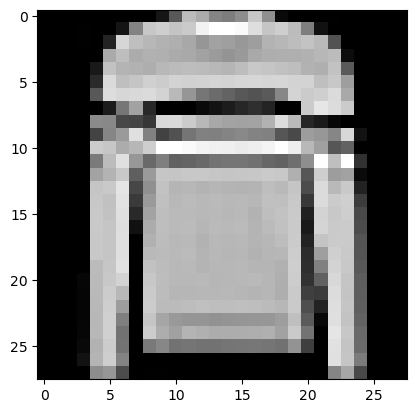

In [107]:
show(train_images[5])

In [108]:
loss = diffusion(training_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape

sampling loop time step: 100%|██████████| 500/500 [00:40<00:00, 12.41it/s]


torch.Size([4, 3, 28, 28])

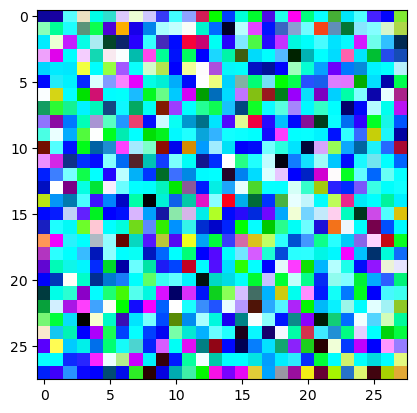

In [109]:
show(sampled_images[0])